# Fake News Detection

# Necesssary files
Donwload data (true.csv and fake.csv) from https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection/data

# Necessary libraries
- pandas
- numpy
- nltk
- sklearn

# Workflow

In this Jupyter Notebook, I have performed various tasks related to analyzing and classifying news articles as genuine or fake. Here is a summary of the tasks I have completed:

1. Data Preparation:
    - Imported necessary libraries such as pandas, numpy, nltk, and sklearn.
    - Loaded the dataset containing fake and genuine news articles.
    - Removed the date column from the dataset.
    - Created target arrays for fake and genuine news.
    - Concatenated the fake and genuine datasets into a single dataframe.

2. Exploratory Data Analysis:
    - Visualized the distribution of news articles in the dataset using pie and bar charts.
    - Explored the distribution of news subjects using a countplot.

3. Data Preprocessing:
    - Cleaned the text data by removing stopwords, non-alphabetic characters, and lemmatizing the words.
    - Visualized the most used words in fake and genuine news articles using frequency distribution plots.

4. Feature Extraction:
    - Created a Bag of Words model using the CountVectorizer.
    - Split the dataset into training and testing sets.

5. Model Training and Evaluation:
    - Trained a Support Vector Machine (SVM) model with a polynomial kernel.
    - Evaluated the model's performance on the training and testing sets.
    - Generated a confusion matrix to visualize the model's predictions.

6. Model Persistence:
    - Saved the trained model, vectorizer, labels, cleaned data, and the original dataset using pickle.

7. Model Deployment:
    - Loaded the saved model, vectorizer, and necessary libraries.
    - Prompted the user to enter a text for prediction.
    - Cleaned the user input and transformed it using the CountVectorizer.
    - Made a prediction on the user input and displayed the result.

This workflow demonstrates the process of analyzing and classifying news articles as genuine or fake using machine learning techniques.


In [40]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import re
import seaborn as sns

# Donwload data from https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection/data?select=fake.csv

# Load the data
fake = pd.read_csv('fake.csv', encoding="utf-8")
genuine = pd.read_csv('true.csv', encoding="utf-8")

# Remove the date
fake.drop(["date"], axis=1, inplace=True)
genuine.drop(["date"], axis=1, inplace=True)

# Create the target arrays
fake['target'] = 1
genuine['target'] = 0

# Concatenate the datasets
data = pd.concat([fake, genuine]).reset_index(drop=True)

<Axes: title={'center': 'News Distribution in the Dataset'}, ylabel='count'>

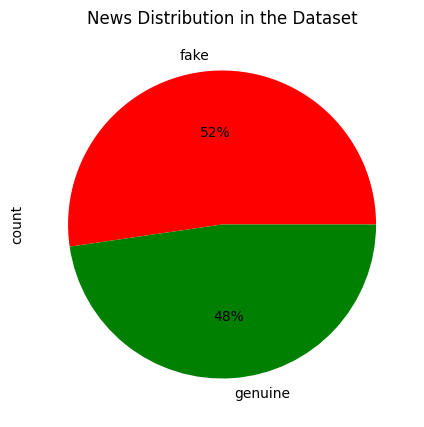

In [41]:
df = pd.concat([fake, genuine], ignore_index=True)
df.sample(frac=1).reset_index(drop=True)

# rename label to fake instead of 1 and genuine instead of 0
df['target'] = df['target'].replace([1], 'fake').replace([0], 'genuine')
df.target.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "green"], figsize=(5, 5), title="News Distribution in the Dataset")

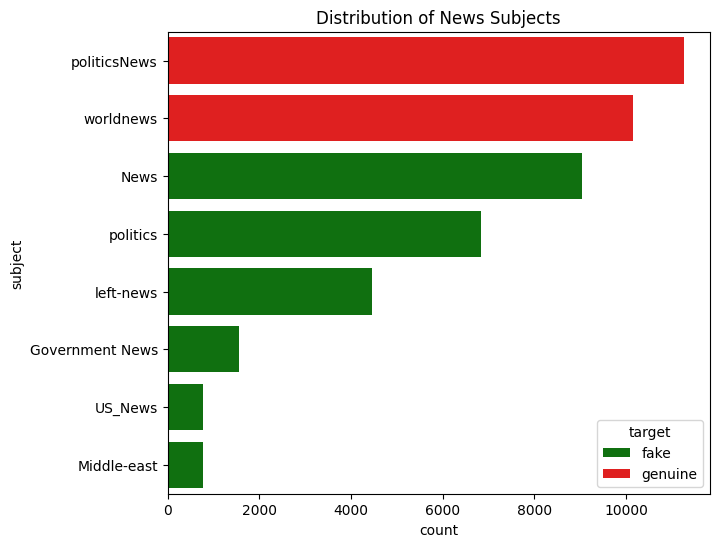

In [42]:
# Order stacks by size
plt.figure(figsize=(7, 6))
sns.countplot(y="subject", hue="target", data=df, palette=["green", "red"], order=df['subject'].value_counts().index)

plt.title("Distribution of News Subjects")
plt.show()

In [43]:
# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

# Show the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   target   44898 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [44]:
fakeFD = nltk.FreqDist(word for text in data[data["target"] == 1]["text"] for word in text.lower().split())
genuineFD = nltk.FreqDist(word  for text in data[data["target"] == 0]["text"] for word in text.lower().split())

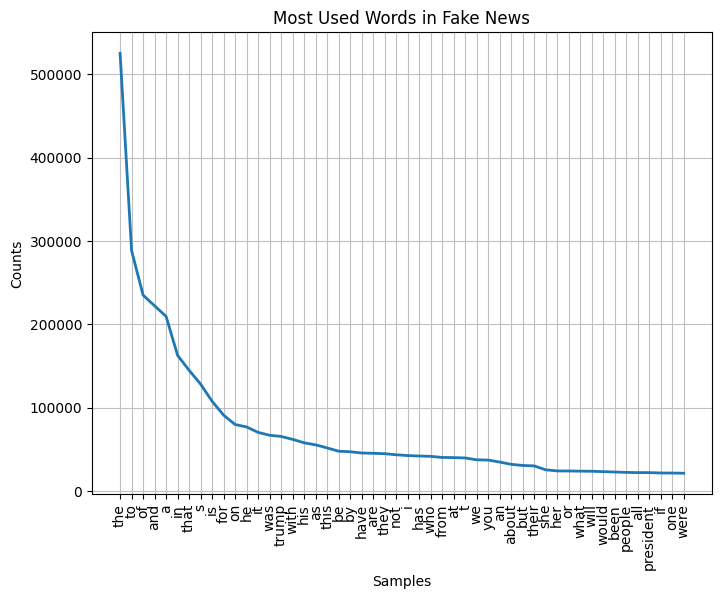

In [45]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Fake News")
fakeFD.plot(50)
plt.show()

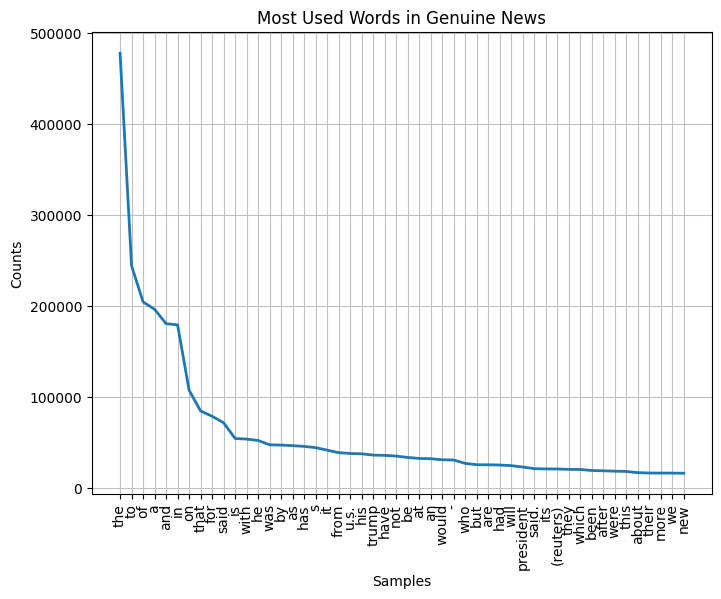

In [46]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Genuine News")
genuineFD.plot(50)
plt.show()

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ismael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
cleanedData = []

# Lemmatize the words
lemma = WordNetLemmatizer()

# Remove the stop words
stop_words = set(stopwords.words('english'))

# Clean the data
for index, row in data.iterrows():
    words = nltk.word_tokenize(row['text'])
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    words = [lemma.lemmatize(w) for w in words]
    cleanedData.append(' '.join(words))

In [49]:
# Print the first 5 rows of the cleaned data
for i in range(0,5):
    print(cleanedData[i],end="\n\n")

This church congregation year ago Watermark Community Church sent letter Jason Thomas formally rejecting member church simply gay In attempt shepherd recognized destructive pattern prohibits u caring playing role desire u life letter stated Specifically desire actively participate relationship another man unwillingness heed biblical counsel church turn relationship made exceedingly difficult shepherd time The church go claim letter value way God uniquely formed want change following church counsel meet person named Brandon similar homosexual feeling Notice church literally outed Brandon Anyway Jason clearly welcome back church unless agreed someone stayed far away One year later Jason happy comfortable sexuality So wrote reply Watermark Community Church informing choice reject best thing could happened full letter via Pink Watermark Community Church Today I celebrate interesting anniversary It exactly one year ago told I longer worthy serve community group member spent year church batt

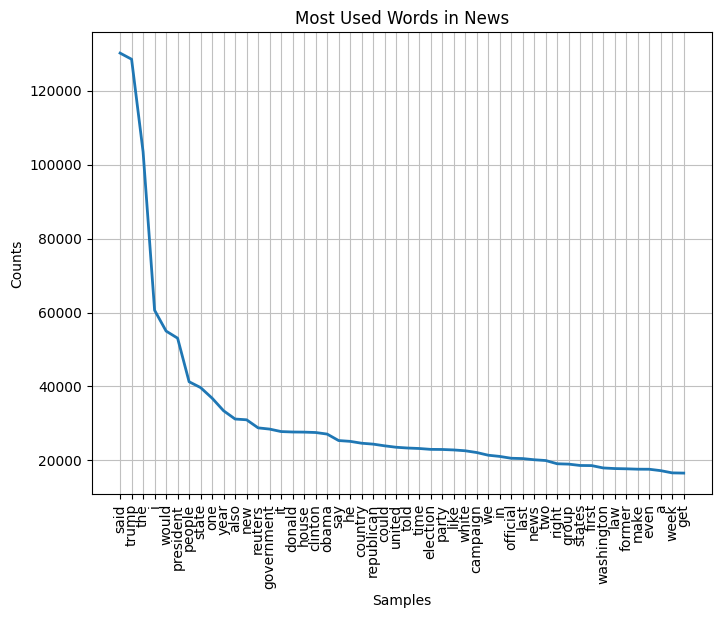

In [50]:
# Visualize the most used words in the cleaned data
allFD = nltk.FreqDist(word  for text in cleanedData for word in text.lower().split())
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in News")
allFD.plot(50)
plt.show()

In [51]:
# Create the Bag of Words model
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(cleanedData)

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(BOW, data['target'], test_size=0.2)

# Show the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create the SVM model
model = svm.SVC(kernel='poly', degree=3, C=1, gamma=1)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
print("Training set score:", model.score(X_train, y_train))
print("Testing set score:", model.score(X_test, y_test))



Training set shape: (35918, 10000)
Testing set shape: (8980, 10000)
Training set score: 0.9999721588061696
Testing set score: 0.9596881959910913


Accuracy: 0.9596881959910913


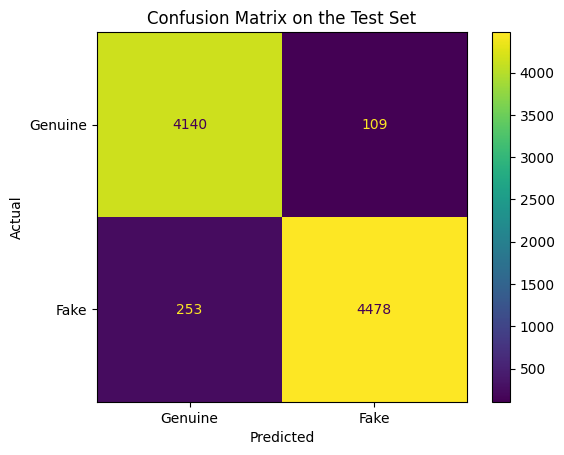

In [60]:
# Predict the test set
y_pred = model.predict(X_test)

# Evaluate predictions
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", score)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# Change the labes for the confusion matrix to be more readable
plt.xticks([0, 1], ['Genuine', 'Fake'])
plt.yticks([0, 1], ['Genuine', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on the Test Set")

plt.show()

In [27]:
# Save the model and the vectorizer

import pickle

# Save the model if the file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

Only save the model when necessary. The code below is for a standalone model that can be used for prediction.

In [31]:
import pickle

# Open the model file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Open the vectorizer file
with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

In [62]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


# Get user input
user_text = input("Enter a text: ")

# Clean the user input
cleaned_user_text = []
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

words = nltk.word_tokenize(user_text)
words = [w for w in words if not w in stop_words]
words = [w for w in words if w.isalpha()]
words = [lemma.lemmatize(w) for w in words]
cleaned_user_text.append(' '.join(words))

print(cleaned_user_text)

# Transform the cleaned user input using the CountVectorizer
user_input_bow = vectorizer.transform(cleaned_user_text)

# Make the prediction
prediction = model.predict(user_input_bow)

# Print the prediction
if prediction[0] == 1:
    print("The text is predicted as fake news.")
else:
    print("The text is predicted as genuine news.")

print(prediction)

['TEL AVIV Israel The main United Nations agency provides aid Palestinians Gaza fired multiple employee following allegation involved attack Hamas killed people Israel In response several donor country joined agency biggest donor pausing funding The Israeli Authorities provided UNRWA information alleged involvement several UNRWA employee horrific attack Israel October said Philippe Lazzarini agency provides aid Palestinian refugee statement Friday Related Story thing know UNRWA Gaza largest aid organization To protect Agency ability deliver humanitarian assistance I taken decision immediately terminate contract staff member launch investigation order establish truth without delay Israel Ministry Foreign Affairs called urgent investigation UNRWA regarding involvement employee terrorist event It important UNRWA conduct thorough internal inspection regarding activity Hamas terrorist element rank order ensure organization humanitarian activity abused said statement Neither Israel United Na